The dataframe generated in the previous code is cleaned and preprocessed here.

In [66]:
import pandas as pd
import numpy as np

In [67]:
full_df = pd.read_csv('full_df.csv')

## 1. Fixing read_sas bug in pandas.

More info: https://github.com/pandas-dev/pandas/issues/30051

In [68]:
print((full_df == 5.397605346934028e-79).sum().sum())

0


In [69]:
full_df=full_df.replace(5.397605346934028e-79,0)

## 2. Identifying missing values in the dataset

**How are missing values, "blank but applicable", "don't know" and other values coded?**

There are codes for refused (7-fill: that is 7, or 77, or 777, ..., depending on the number of digits required for a particular data value), don't know (9-fill), and missing values (a blank field) which means the person was not asked the question or given the test.

Let me explain better how missing values are coded:
- When the number of unique values is lower than 7, then missing values are coded with 7 and 9, For example, variable SXQ803.
- When the number of unique values if higher than 7 but lower than 77, then missing values are coded with 77 and 99, for example SXD031.
- When the number of unique values if higher than 77 but lower than 777, then missing values are coded with 777 and 999, for example ALQ141Q.
- And so on.

https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/faq.aspx#Q15

In [70]:
# Function to determine the appropriate missing value codes based on unique value count
def get_missing_codes(count):
    if count < 7:
        return [7, 9, 77, 99, 777, 999,7777, 9999, 77777, 99999, 777777, 999999]
    elif count < 77:
        return [77, 99, 777, 999,7777, 9999, 77777, 99999, 777777, 999999]
    elif count < 777:
        return [777, 999,7777, 9999, 77777, 99999, 777777, 999999]
    # Extend further as needed, but for the scope of the current dataset, this should suffice
    else:
        return []

In [71]:
# Iterate through columns and replace the appropriate missing value codes
for col in full_df.columns:
    unique_count = full_df[col].nunique()
    missing_codes = get_missing_codes(unique_count)
    
    full_df[col].replace(missing_codes, np.nan, inplace=True)

## 3. Age 80+ topcoded as 80

 Individuals 80 and over are topcoded at 80 years of age. (https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DEMO_H.htm#RIDAGEYR)

The goal of the models will be to identify individuals with low bone density to apply counter measures before a fracture occurs, since osteoporosis is a silent disease. People of 80 and above have very likely low bone density due to their age.

In [72]:
full_df['RIDAGEYR'].max()

80.0

<Axes: ylabel='Frequency'>

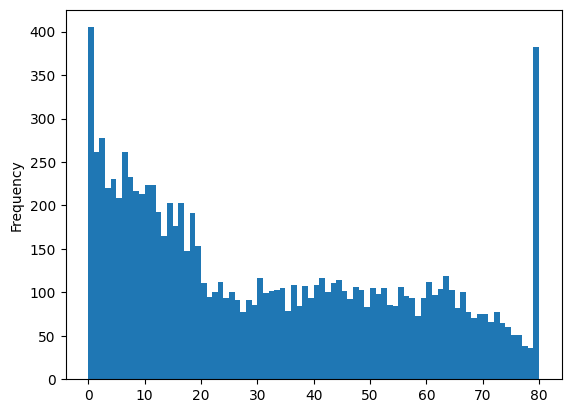

In [73]:
full_df['RIDAGEYR'].plot.hist(bins=80)

In [74]:
full_df[full_df['RIDAGEYR'] == 80].shape[0]

352

In [75]:
full_df = full_df[full_df['RIDAGEYR'] != 80]

<Axes: ylabel='Frequency'>

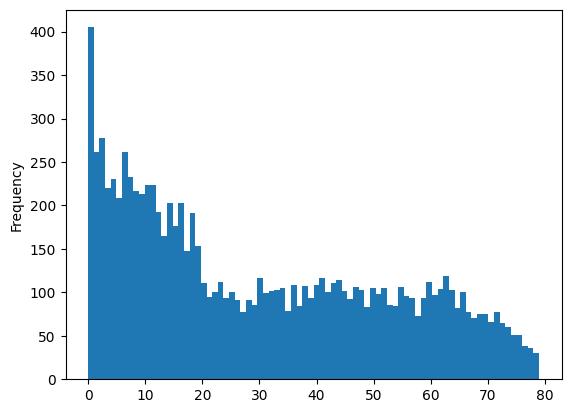

In [76]:
full_df['RIDAGEYR'].plot.hist(bins=80)

## X. Store full_df after data preprocessing 

In [77]:
# Save full dataframe into a csv file and a pickle file
full_df.to_csv('full_df.csv', index=False)
full_df.to_pickle('full_df.pkl')